## Acquisition Analytics : Bank Marketing Assignment

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

#### The business objective is to capture 80% of total responders at the minimum possible cost. 

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("C:/Users/hp/Desktop/bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan['Prospect ID'] = loan.index

In [4]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
Prospect ID       0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [5]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Prospect ID
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4


In [6]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'Prospect ID'],
      dtype='object')

In [7]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [8]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [9]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [10]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [11]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [12]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

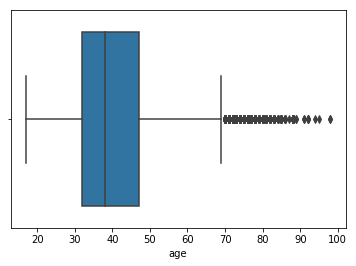

In [13]:
sns.boxplot(x='age', data=loan)
plt.show()

In [14]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

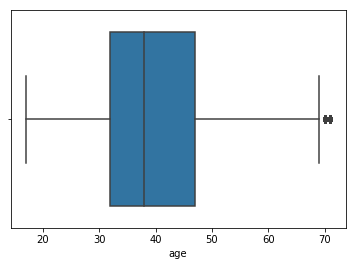

In [15]:
sns.boxplot(x='age', data=loan)
plt.show()

In [16]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [17]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [18]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [19]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [20]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [21]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


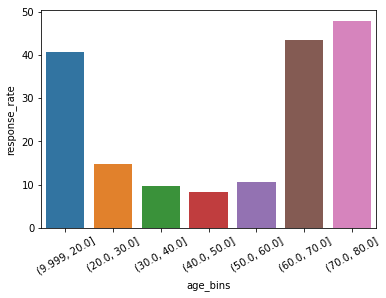

In [22]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [23]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Prospect ID,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [24]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [25]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [26]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [27]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [28]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [29]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


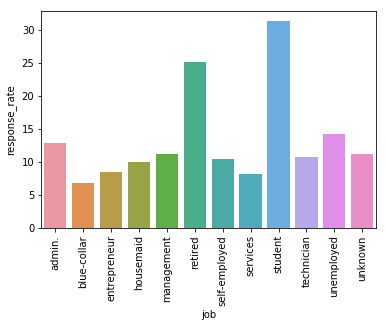

In [30]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [31]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [32]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [33]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [34]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [35]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [36]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [37]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


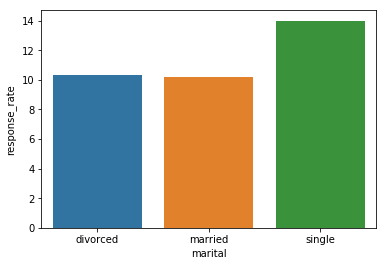

In [38]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [39]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [40]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [41]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [42]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [43]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [44]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [45]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [46]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


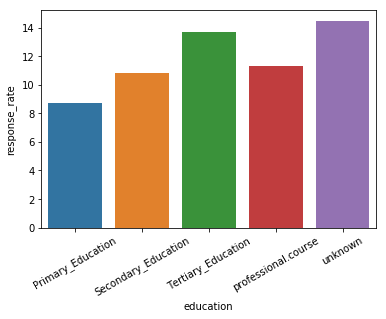

In [47]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [48]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [49]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [50]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [51]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [52]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [53]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


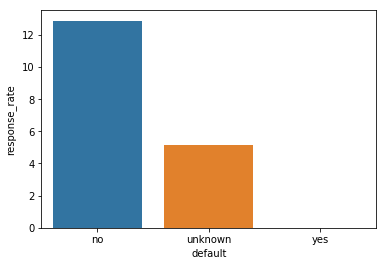

In [54]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [55]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [56]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [57]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [58]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [59]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [60]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


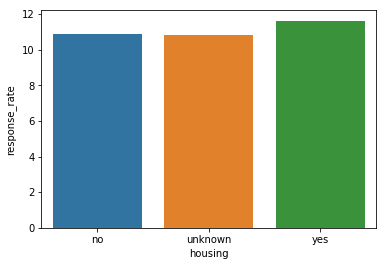

In [61]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [62]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [63]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [64]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [65]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [66]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [67]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


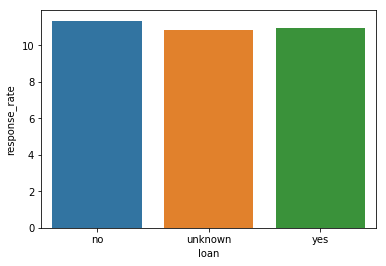

In [68]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [69]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [70]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [71]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [72]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [73]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [74]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


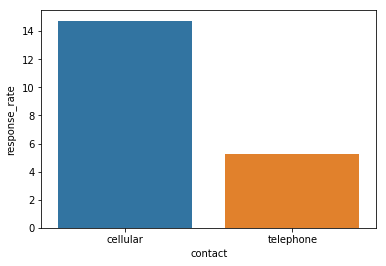

In [75]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [76]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [77]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [78]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [79]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [80]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [81]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


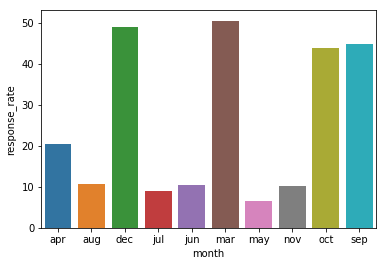

In [82]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [83]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [84]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [85]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [86]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [87]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [88]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


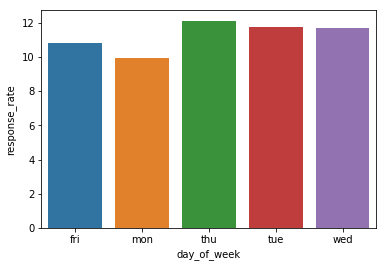

In [89]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

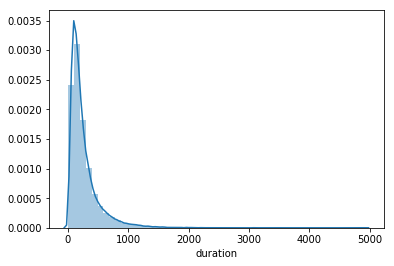

In [90]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [91]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

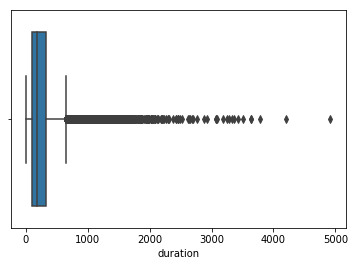

In [92]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [93]:
loan['duration'][loan['duration']>1271] =1271

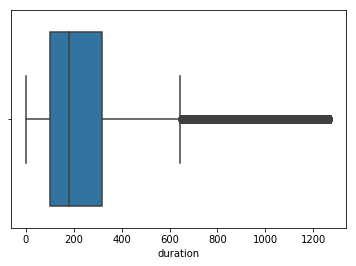

In [94]:
sns.boxplot(x='duration', data=loan)
plt.show()

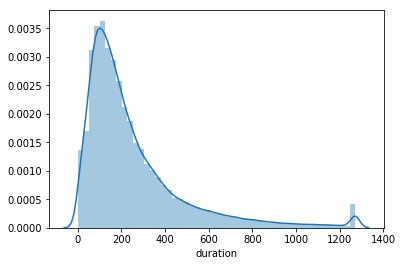

In [95]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [96]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

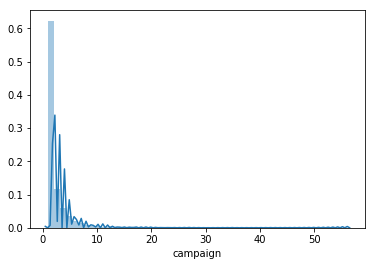

In [97]:
sns.distplot(loan['campaign'])
plt.show()

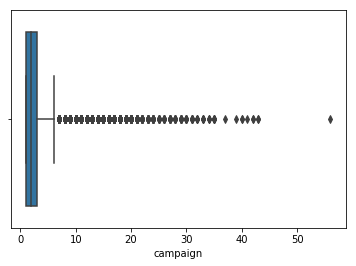

In [98]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [99]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [100]:
loan['campaign'][loan['campaign']>14] =14

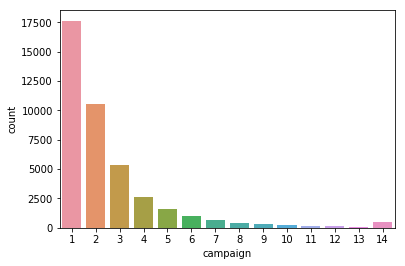

In [101]:
sns.countplot(loan['campaign'])
plt.show()

In [102]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [103]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [104]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [105]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [106]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


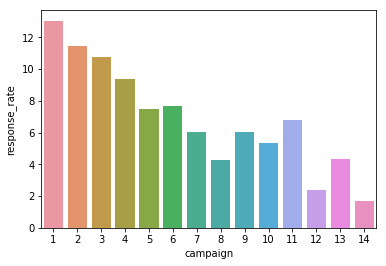

In [107]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [108]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [109]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [110]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [111]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [112]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [113]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [114]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [115]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


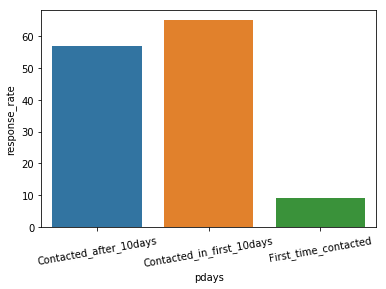

In [116]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [117]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [118]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [119]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [120]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [121]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [122]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [123]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [124]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


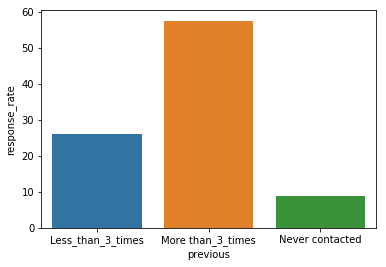

In [125]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [126]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'Prospect ID',
       'age_bins'],
      dtype='object')

#### Employment Variation Rate

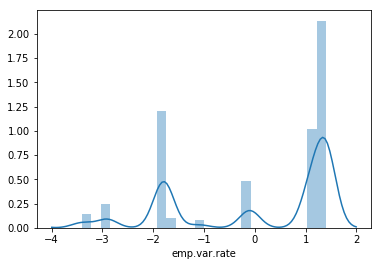

In [127]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [128]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [129]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [130]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [131]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [132]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [133]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [134]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


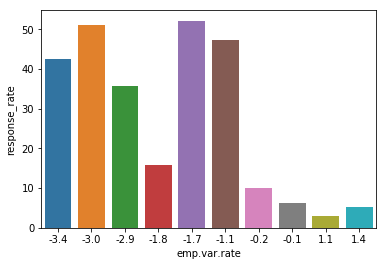

In [135]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

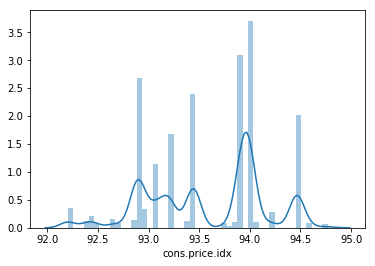

In [136]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [137]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [138]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

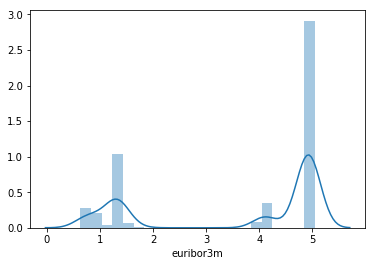

In [139]:
sns.distplot(loan['euribor3m'])
plt.show()

In [140]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

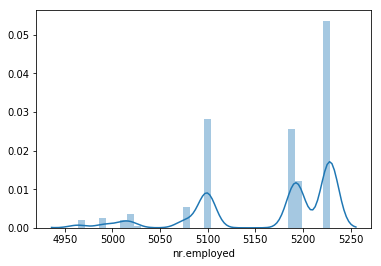

In [141]:
sns.distplot(loan['nr.employed'])
plt.show()

In [142]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [143]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [144]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'Prospect ID',
       'age_bins'],
      dtype='object')

In [145]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [146]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [147]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [148]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [149]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [150]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [151]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [152]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [153]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [154]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [155]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [156]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [157]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [158]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [159]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [160]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [161]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Prospect ID,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,1,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,2,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,3,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,4,...,1,0,0,0,0,1,0,1,1,0


In [162]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [163]:
# To build model without including the variable ‘duration’, let us first create a copy of dataframe & then drop ‘duration’

In [164]:
loan_copy = loan

In [165]:
# Putting feature variable to X
X = loan.drop(['response', 'duration'],axis=1)

# Putting response variable to y
y = loan['response']

In [166]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [167]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Prospect ID,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,7019,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,27175,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,15817,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,40971,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,8467,0,0,...,0,0,1,0,0,1,0,1,1,0


In [168]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [169]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [170]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [171]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [172]:
X_train.head()

,Prospect ID,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,7019,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,27175,0,0,0,0,0,0,0,0,1,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,15817,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,40971,0,0,0,0,1,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,8467,0,0,0,0,0,0,0,0,1,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [173]:
# Standardisation continuous features for X_test
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [174]:
std_X_test_df=(X_test_df-X_train_df.mean())/X_train_df.std()

In [175]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [176]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [177]:
X_test.head()

,Prospect ID,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,33148,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.171247,-0.652021,-1.197437,-1.182133,-1.228380,-1.341349,-0.938292
27585,27585,0,0,0,0,0,0,0,0,1,...,1,1,0,0.103740,0.646930,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15722,15722,1,0,0,0,0,0,0,0,0,...,1,1,0,-0.582791,-0.652021,0.840847,0.591769,-0.471164,0.773077,0.847088
40349,40349,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.171247,-0.219037,-1.133741,0.780409,0.480766,-1.567256,-2.426109
2576,2576,0,0,0,0,0,0,1,0,0,...,1,1,0,1.476802,-0.219037,0.649758,0.723298,0.891826,0.713143,0.333618


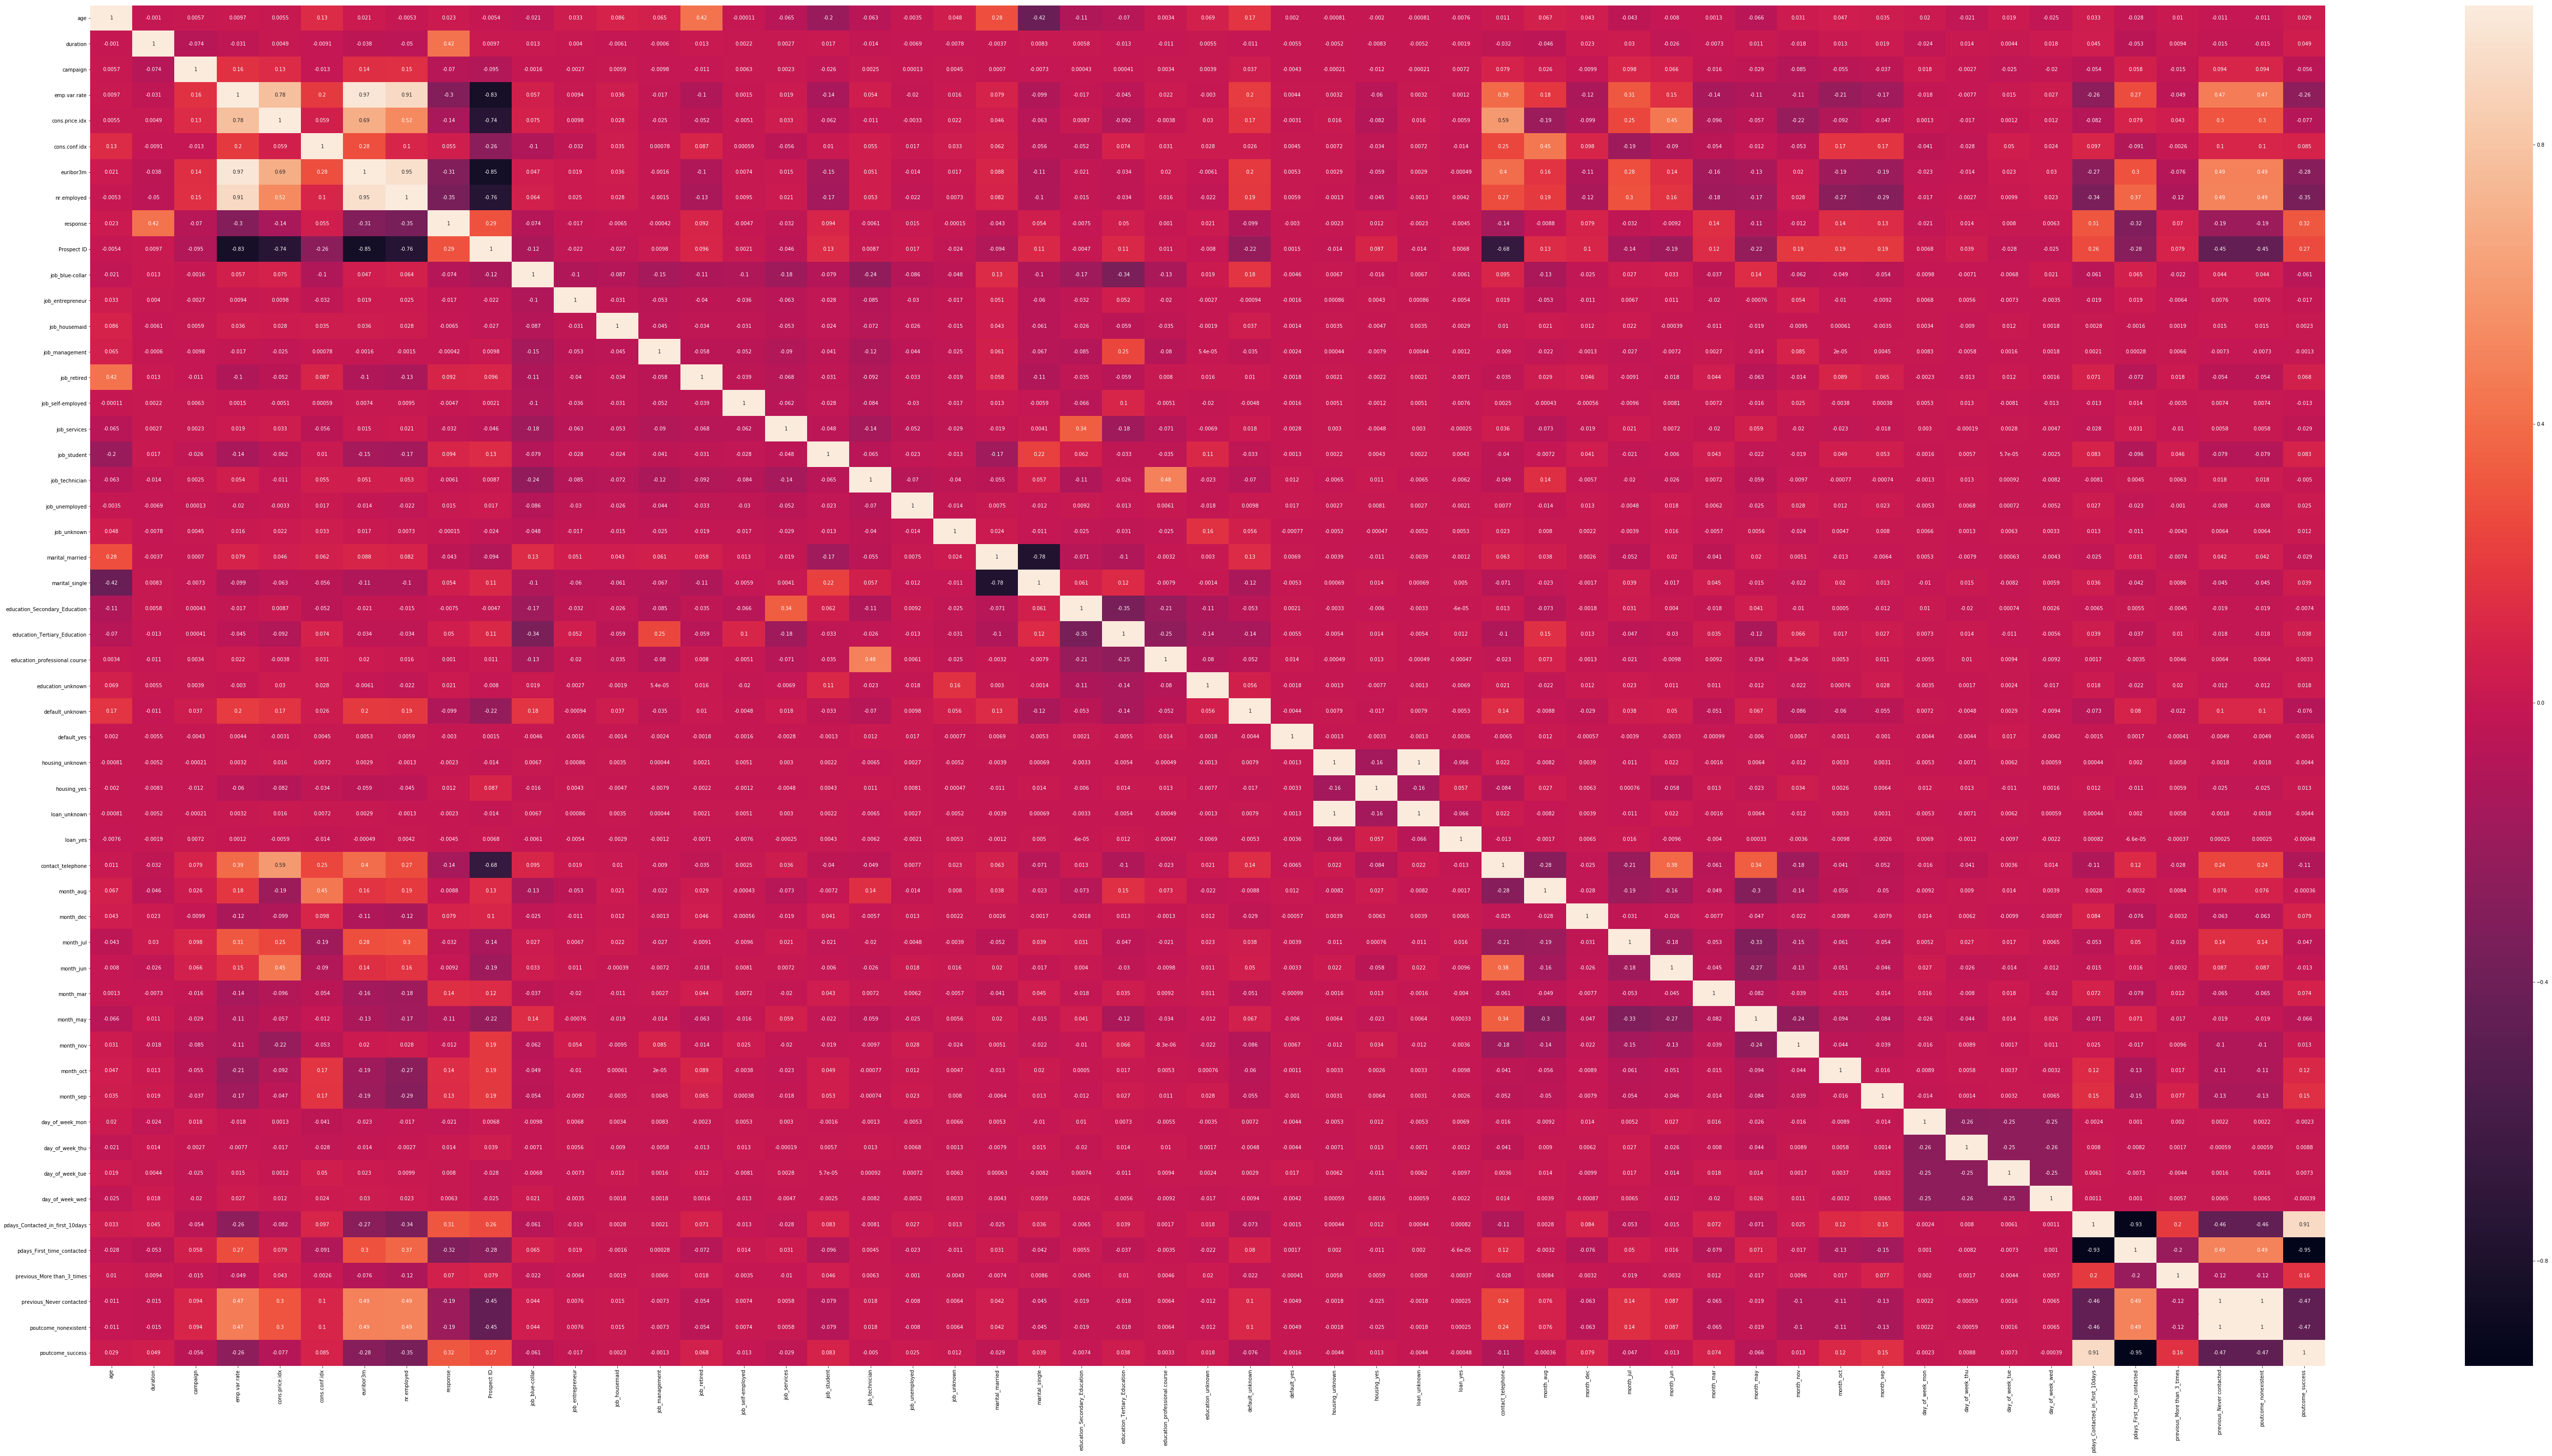

In [178]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,50))        # Size of the figure
sns.heatmap(loan.corr(),annot = True)
plt.show()

### RFE & Model Building



In [179]:
#Import statsmodel
import statsmodels.api as sm

In [180]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [181]:
# Fitting the model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
# Run GLM model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28781
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7924.8
Date:                Thu, 25 Jul 2019   Deviance:                       15850.
Time:                        21:28:36   Pearson chi2:                 2.93e+04
No. Iterations:                    19   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.1658      0.311     -6.956      0.000      -2.776      -1.556
Prospect ID                      3.503e-05   8.45e-06      4.145      0.000    1.85e-05    5.16e-05
job_blue-collar                    -0.1443      0.083     -1.743      0.081      -0.307       0.018
job_entrepreneur                   -0.2262      0.132     -1.709      0.087      -0.486       0.033
job_housemaid                       0.0262      0.148      0.177      0.859      -0.264       0.316
job_management                     -0.1450      0.092     -1.580      0.114      -0.325       0.035
job_retired                         0.2435      0.110      2.209      0.027       0.027       0.460
job_self-employed                  -0.0615      0.121     -0.507      0.612      -0.300       0.177
job_services                       -0.0519      0.088     -0.587      0.557      -0.225       0.121
job_student                         0.2790      0.120      2.330      0.020       0.044       0.514
job_technician                     -0.0144      0.075     -0.192      0.848      -0.161       0.132
job_unemployed                     -0.0265      0.134     -0.197      0.844      -0.290       0.237
job_unknown                        -0.1099      0.242     -0.455      0.649      -0.583       0.364
marital_married                     0.0547      0.072      0.763      0.445      -0.086       0.195
marital_single                      0.1151      0.082      1.406      0.160      -0.045       0.276
education_Secondary_Education       0.0312      0.072      0.432      0.666      -0.110       0.173
education_Tertiary_Education        0.1093      0.073      1.494      0.135      -0.034       0.253
education_professional.course       0.0665      0.086      0.774      0.439      -0.102       0.235
education_unknown                   0.1742      0.109      1.594      0.111      -0.040       0.388
default_unknown                    -0.2652      0.070     -3.804      0.000      -0.402      -0.129
default_yes                       -17.6094   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0476      0.071     -0.669      0.503      -0.187       0.092
housing_yes                        -0.0393      0.043     -0.909      0.363      -0.124       0.045
loan_unknown                       -0.0476      0.071     -0.669      0.503      -0.187       0.092
loan_yes                            0.0105      0.059      0.177      0.859      -0.106       0.127
contact_telephone                  -0.5364      0.081     -6.641      0.000      -0.695      -0.378
month_aug                           0.0873      0.153      0.571      0.568      -0.212       0.387
month_dec                          -0.0055      0.237     -0.023      0.982      -0.470       0.459
month_jul                          -0.2931      0.121     -2.4

In [183]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

In [184]:
# Import logisticregression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [185]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [186]:
#View the list of columns and their ranking based on RFE output
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Prospect ID', False, 34),
 ('job_blue-collar', False, 19),
 ('job_entrepreneur', False, 11),
 ('job_housemaid', False, 27),
 ('job_management', False, 12),
 ('job_retired', True, 1),
 ('job_self-employed', False, 33),
 ('job_services', False, 24),
 ('job_student', True, 1),
 ('job_technician', False, 30),
 ('job_unemployed', False, 21),
 ('job_unknown', False, 23),
 ('marital_married', False, 26),
 ('marital_single', False, 10),
 ('education_Secondary_Education', False, 29),
 ('education_Tertiary_Education', False, 8),
 ('education_professional.course', False, 25),
 ('education_unknown', False, 7),
 ('default_unknown', True, 1),
 ('default_yes', False, 3),
 ('housing_unknown', False, 15),
 ('housing_yes', False, 22),
 ('loan_unknown', False, 5),
 ('loan_yes', False, 28),
 ('contact_telephone', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_jul', False, 17),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('mo

In [187]:
col = X_train.columns[rfe.support_]

In [188]:
X_train.columns[~rfe.support_]

Index(['Prospect ID', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_Secondary_Education', 'education_Tertiary_Education',
       'education_professional.course', 'education_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'month_jul', 'month_oct', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'poutcome_nonexistent', 'age', 'campaign', 'cons.conf.idx',
       'nr.employed'],
      dtype='object')

In [189]:
#Re-Run the model after RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28812
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7980.7
Date:                Thu, 25 Jul 2019   Deviance:                       15961.
Time:                        21:28:52   Pearson chi2:                 2.87e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5338      0.217     -7.078      0.000      -1.959      -1.109
job_retired                    0.3089      0.083      3.704      0.000       0.145       0.472
job_student                    0.3548      0.105      3.383      0.001       0.149       0.560
default_unknown               -0.3182      0.068     -4.712      0.000      -0.451      -0.186
contact_telephone             -0.5702      0.070     -8.190      0.000      -0.707      -0.434
month_aug                      0.5357      0.080      6.736      0.000       0.380       0.692
month_dec                      0.2601      0.200      1.299      0.194      -0.132       0.653
month_jun                     -0.5426      0.084     -6.498      0.000      -0.706      -0.379
month_mar                      1.3465      0.120     11.248      0.000       1.112       1.581
month_may                     -0.4646      0.065     -7.150      0.000      -0.592      -0.337
month_nov                     -0.5359      0.086     -6.214      0.000      -0.705      -0.367
month_sep                      0.2942      0.118      2.496      0.013       0.063       0.525
pdays_First_time_contacted    -1.0076      0.217     -4.637      0.000      -1.434      -0.582
previous_More than_3_times    -0.3152      0.283     -1.114      0.265      -0.870       0.240
previous_Never contacted       0.4818      0.067      7.176      0.000       0.350       0.613
poutcome_success               0.8579      0.219      3.914      0.000       0.428       1.287
emp.var.rate                  -2.3784      0.150    -15.894      0.000      -2.672      -2.085
cons.price.idx                 0.9653      0.057     16.930      0.000       0.854       1.077
euribor3m                      1.0020      0.125      8.040      0.000       0.758       1.246
==============================================================================================
"""

In [190]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7019     0.038247
27175    0.035951
15817    0.062175
40971    0.439087
8467     0.048891
21860    0.036066
11416    0.051506
27833    0.442184
26816    0.063743
28102    0.216833
dtype: float64

In [191]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03824701, 0.03595121, 0.06217456, 0.43908706, 0.04889088,
       0.0360655 , 0.05150581, 0.44218375, 0.06374278, 0.2168335 ])

In [192]:
#Create dataframe with Convert flag, Convert probability and Lead Number
y_train_pred_final = pd.DataFrame({'Response':y_train.values, 'response_prob_M2':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID
0,0,0.038247,7019
1,0,0.035951,27175
2,0,0.062175,15817
3,0,0.439087,40971
4,0,0.048891,8467


In [193]:
#Create a predicted flag
y_train_pred_final['predicted'] = y_train_pred_final.response_prob_M2.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted
0,0,0.038247,7019,0
1,0,0.035951,27175,0
2,0,0.062175,15817,0
3,0,0.439087,40971,0
4,0,0.048891,8467,0


In [194]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)

[[25186   387]
 [ 2521   737]]


In [195]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted))

0.8991363462939197


In [196]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [197]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,emp.var.rate,76.33
17,euribor3m,51.42
11,pdays_First_time_contacted,15.21
13,previous_Never contacted,11.93
16,cons.price.idx,11.59
3,contact_telephone,4.81
8,month_may,3.49
4,month_aug,2.60
6,month_jun,2.39
9,month_nov,1.97


In [198]:
col=col.drop('emp.var.rate')
col

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_sep', 'pdays_First_time_contacted',
       'previous_More than_3_times', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [199]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28813
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.2
Date:                Thu, 25 Jul 2019   Deviance:                       16206.
Time:                        21:28:55   Pearson chi2:                 3.07e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4205      0.215     -6.618      0.000      -1.841      -1.000
job_retired                    0.4285      0.082      5.245      0.000       0.268       0.589
job_student                    0.4365      0.103      4.231      0.000       0.234       0.639
default_unknown               -0.3649      0.067     -5.428      0.000      -0.497      -0.233
contact_telephone             -0.2074      0.063     -3.291      0.001      -0.331      -0.084
month_aug                      0.0815      0.072      1.131      0.258      -0.060       0.223
month_dec                      0.4705      0.198      2.371      0.018       0.082       0.860
month_jun                      0.0647      0.075      0.863      0.388      -0.082       0.211
month_mar                      0.8334      0.116      7.172      0.000       0.606       1.061
month_may                     -0.8500      0.060    -14.264      0.000      -0.967      -0.733
month_nov                     -0.0656      0.080     -0.820      0.412      -0.223       0.091
month_sep                      0.2881      0.118      2.435      0.015       0.056       0.520
pdays_First_time_contacted    -1.1926      0.215     -5.547      0.000      -1.614      -0.771
previous_More than_3_times    -0.3405      0.284     -1.199      0.231      -0.897       0.216
previous_Never contacted       0.4743      0.066      7.230      0.000       0.346       0.603
poutcome_success               0.7769      0.217      3.584      0.000       0.352       1.202
cons.price.idx                 0.1767      0.027      6.530      0.000       0.124       0.230
euribor3m                     -0.9242      0.030    -30.348      0.000      -0.984      -0.865
==============================================================================================
"""

In [200]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [201]:
y_train_pred[:10]

array([0.02343893, 0.06058436, 0.06015873, 0.38308381, 0.06458289,
       0.03995432, 0.0615926 , 0.38324944, 0.07155046, 0.24003738])

In [202]:
y_train_pred_final['response_prob_M3'] = y_train_pred

In [203]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.response_prob_M3.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3
0,0,0.038247,7019,0,0.023439
1,0,0.035951,27175,0,0.060584
2,0,0.062175,15817,0,0.060159
3,0,0.439087,40971,0,0.383084
4,0,0.048891,8467,0,0.064583


In [204]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)

[[25247   326]
 [ 2573   685]]


In [205]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted))

0.8994485102840692


In [206]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,pdays_First_time_contacted,14.92
13,previous_Never contacted,11.92
15,cons.price.idx,4.18
16,euribor3m,3.91
3,contact_telephone,3.86
8,month_may,3.34
6,month_jun,2.15
4,month_aug,2.05
9,month_nov,1.69
14,poutcome_success,1.33


In [207]:
col=col.drop('pdays_First_time_contacted')
col

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_sep', 'previous_More than_3_times',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [208]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28814
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8118.1
Date:                Thu, 25 Jul 2019   Deviance:                       16236.
Time:                        21:28:58   Pearson chi2:                 3.08e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.5473      0.072    -35.288      0.000      -2.689      -2.406
job_retired                    0.4299      0.082      5.272      0.000       0.270       0.590
job_student                    0.4615      0.103      4.493      0.000       0.260       0.663
default_unknown               -0.3659      0.067     -5.447      0.000      -0.498      -0.234
contact_telephone             -0.2069      0.063     -3.283      0.001      -0.330      -0.083
month_aug                      0.1025      0.072      1.426      0.154      -0.038       0.243
month_dec                      0.4687      0.198      2.369      0.018       0.081       0.857
month_jun                      0.0617      0.075      0.824      0.410      -0.085       0.208
month_mar                      0.8412      0.116      7.259      0.000       0.614       1.068
month_may                     -0.8545      0.060    -14.353      0.000      -0.971      -0.738
month_nov                     -0.0503      0.080     -0.630      0.529      -0.207       0.106
month_sep                      0.2923      0.118      2.475      0.013       0.061       0.524
previous_More than_3_times    -0.0743      0.291     -0.256      0.798      -0.644       0.495
previous_Never contacted       0.4029      0.063      6.362      0.000       0.279       0.527
poutcome_success               1.8768      0.090     20.798      0.000       1.700       2.054
cons.price.idx                 0.1862      0.027      6.908      0.000       0.133       0.239
euribor3m                     -0.9341      0.030    -30.777      0.000      -0.994      -0.875
==============================================================================================
"""

In [209]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [210]:
y_train_pred[:10]

array([0.02321922, 0.0606885 , 0.05973656, 0.4067185 , 0.06455736,
       0.04013288, 0.06153708, 0.38358123, 0.07161715, 0.23973713])

In [211]:
y_train_pred_final['response_prob_M4'] = y_train_pred

In [212]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.response_prob_M4.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3,response_prob_M4
0,0,0.038247,7019,0,0.023439,0.023219
1,0,0.035951,27175,0,0.060584,0.060689
2,0,0.062175,15817,0,0.060159,0.059737
3,0,0.439087,40971,0,0.383084,0.406718
4,0,0.048891,8467,0,0.064583,0.064557


In [213]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)

[[25263   310]
 [ 2595   663]]


In [214]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted))

0.899240400957303


In [215]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,cons.price.idx,4.16
3,contact_telephone,3.86
15,euribor3m,3.64
12,previous_Never contacted,3.40
8,month_may,3.01
6,month_jun,2.07
4,month_aug,1.87
9,month_nov,1.47
2,default_unknown,1.31
13,poutcome_success,1.25


In [216]:
col=col.drop('previous_More than_3_times')
col

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_sep', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [217]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8118.2
Date:                Thu, 25 Jul 2019   Deviance:                       16236.
Time:                        21:29:01   Pearson chi2:                 3.08e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5477      0.072    -35.299      0.000      -2.689      -2.406
job_retired                  0.4299      0.082      5.273      0.000       0.270       0.590
job_student                  0.4604      0.103      4.486      0.000       0.259       0.662
default_unknown             -0.3658      0.067     -5.446      0.000      -0.497      -0.234
contact_telephone           -0.2065      0.063     -3.278      0.001      -0.330      -0.083
month_aug                    0.1011      0.072      1.411      0.158      -0.039       0.241
month_dec                    0.4686      0.198      2.369      0.018       0.081       0.856
month_jun                    0.0618      0.075      0.827      0.408      -0.085       0.208
month_mar                    0.8409      0.116      7.258      0.000       0.614       1.068
month_may                   -0.8549      0.060    -14.364      0.000      -0.972      -0.738
month_nov                   -0.0517      0.080     -0.648      0.517      -0.208       0.105
month_sep                    0.2913      0.118      2.468      0.014       0.060       0.523
previous_Never contacted     0.4037      0.063      6.379      0.000       0.280       0.528
poutcome_success             1.8755      0.090     20.818      0.000       1.699       2.052
cons.price.idx               0.1851      0.027      6.955      0.000       0.133       0.237
euribor3m                   -0.9333      0.030    -30.892      0.000      -0.993      -0.874
============================================================================================
"""

In [218]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [219]:
y_train_pred[:10]

array([0.02322082, 0.06070221, 0.0597508 , 0.40589142, 0.06454057,
       0.04012781, 0.06152338, 0.38371747, 0.07160979, 0.23980165])

In [220]:
y_train_pred_final['response_prob_M5'] = y_train_pred

In [221]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.response_prob_M5.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3,response_prob_M4,response_prob_M5
0,0,0.038247,7019,0,0.023439,0.023219,0.023221
1,0,0.035951,27175,0,0.060584,0.060689,0.060702
2,0,0.062175,15817,0,0.060159,0.059737,0.059751
3,0,0.439087,40971,0,0.383084,0.406718,0.405891
4,0,0.048891,8467,0,0.064583,0.064557,0.064541


In [222]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)

[[25263   310]
 [ 2596   662]]


In [223]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted))

0.8992057160695085


In [224]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,cons.price.idx,4.05
3,contact_telephone,3.86
14,euribor3m,3.58
11,previous_Never contacted,3.39
8,month_may,3.01
6,month_jun,2.07
4,month_aug,1.85
9,month_nov,1.46
2,default_unknown,1.31
12,poutcome_success,1.24


In [225]:
col=col.drop('month_jun')
col


Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov',
       'month_sep', 'previous_Never contacted', 'poutcome_success',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

In [226]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8118.5
Date:                Thu, 25 Jul 2019   Deviance:                       16237.
Time:                        21:29:03   Pearson chi2:                 3.07e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5354      0.071    -35.938      0.000      -2.674      -2.397
job_retired                  0.4269      0.081      5.241      0.000       0.267       0.587
job_student                  0.4594      0.103      4.475      0.000       0.258       0.661
default_unknown             -0.3659      0.067     -5.447      0.000      -0.498      -0.234
contact_telephone           -0.1897      0.059     -3.190      0.001      -0.306      -0.073
month_aug                    0.0888      0.070      1.269      0.204      -0.048       0.226
month_dec                    0.4545      0.197      2.307      0.021       0.068       0.841
month_mar                    0.8262      0.114      7.218      0.000       0.602       1.051
month_may                   -0.8719      0.056    -15.647      0.000      -0.981      -0.763
month_nov                   -0.0651      0.078     -0.834      0.404      -0.218       0.088
month_sep                    0.2746      0.116      2.361      0.018       0.047       0.503
previous_Never contacted     0.4042      0.063      6.387      0.000       0.280       0.528
poutcome_success             1.8774      0.090     20.844      0.000       1.701       2.054
cons.price.idx               0.1874      0.026      7.080      0.000       0.136       0.239
euribor3m                   -0.9348      0.030    -31.050      0.000      -0.994      -0.876
============================================================================================
"""

In [227]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)



In [228]:
y_train_pred[:10]


array([0.02351944, 0.06153105, 0.06048487, 0.40966372, 0.06276163,
       0.04008366, 0.05981755, 0.38301595, 0.07145112, 0.24214385])

In [229]:
y_train_pred_final['response_prob_M6'] = y_train_pred



In [230]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.response_prob_M6.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3,response_prob_M4,response_prob_M5,response_prob_M6
0,0,0.038247,7019,0,0.023439,0.023219,0.023221,0.023519
1,0,0.035951,27175,0,0.060584,0.060689,0.060702,0.061531
2,0,0.062175,15817,0,0.060159,0.059737,0.059751,0.060485
3,0,0.439087,40971,0,0.383084,0.406718,0.405891,0.409664
4,0,0.048891,8467,0,0.064583,0.064557,0.064541,0.062762


In [231]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)

[[25263   310]
 [ 2592   666]]


In [232]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted))

0.8993444556206861


In [233]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cons.price.idx,3.77
3,contact_telephone,3.20
10,previous_Never contacted,3.09
13,euribor3m,3.09
7,month_may,2.33
4,month_aug,1.85
8,month_nov,1.46
2,default_unknown,1.31
11,poutcome_success,1.24
9,month_sep,1.09


In [234]:
col=col.drop('month_aug')
col

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_dec', 'month_mar', 'month_may', 'month_nov', 'month_sep',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [235]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8119.3
Date:                Thu, 25 Jul 2019   Deviance:                       16239.
Time:                        21:29:06   Pearson chi2:                 3.07e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5077      0.067    -37.456      0.000      -2.639      -2.376
job_retired                  0.4325      0.081      5.319      0.000       0.273       0.592
job_student                  0.4656      0.102      4.546      0.000       0.265       0.666
default_unknown             -0.3688      0.067     -5.494      0.000      -0.500      -0.237
contact_telephone           -0.1957      0.059     -3.303      0.001      -0.312      -0.080
month_dec                    0.4291      0.196      2.188      0.029       0.045       0.813
month_mar                    0.8075      0.113      7.117      0.000       0.585       1.030
month_may                   -0.8924      0.053    -16.752      0.000      -0.997      -0.788
month_nov                   -0.0945      0.074     -1.270      0.204      -0.240       0.051
month_sep                    0.2620      0.116      2.261      0.024       0.035       0.489
previous_Never contacted     0.4006      0.063      6.342      0.000       0.277       0.524
poutcome_success             1.8864      0.090     21.019      0.000       1.710       2.062
cons.price.idx               0.1760      0.025      7.061      0.000       0.127       0.225
euribor3m                   -0.9226      0.029    -32.304      0.000      -0.979      -0.867
============================================================================================
"""

In [236]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)


In [237]:

y_train_pred[:10]


array([0.02347405, 0.06146542, 0.06202136, 0.40833871, 0.06330681,
       0.03799532, 0.06037688, 0.38439408, 0.07180048, 0.24560693])

In [238]:
y_train_pred_final['response_prob_M7'] = y_train_pred



In [239]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.response_prob_M7.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3,response_prob_M4,response_prob_M5,response_prob_M6,response_prob_M7
0,0,0.038247,7019,0,0.023439,0.023219,0.023221,0.023519,0.023474
1,0,0.035951,27175,0,0.060584,0.060689,0.060702,0.061531,0.061465
2,0,0.062175,15817,0,0.060159,0.059737,0.059751,0.060485,0.062021
3,0,0.439087,40971,0,0.383084,0.406718,0.405891,0.409664,0.408339
4,0,0.048891,8467,0,0.064583,0.064557,0.064541,0.062762,0.063307


In [240]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)


[[25266   307]
 [ 2596   662]]


In [241]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted))

0.8993097707328916


In [242]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,contact_telephone,3.19
11,cons.price.idx,2.97
12,euribor3m,2.57
9,previous_Never contacted,2.37
6,month_may,2.17
2,default_unknown,1.31
7,month_nov,1.26
10,poutcome_success,1.16
8,month_sep,1.09
0,job_retired,1.07


In [243]:
col=col.drop('month_nov')
col

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_dec', 'month_mar', 'month_may', 'month_sep',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [244]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8120.1
Date:                Thu, 25 Jul 2019   Deviance:                       16240.
Time:                        21:29:08   Pearson chi2:                 3.08e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5298      0.065    -39.104      0.000      -2.657      -2.403
job_retired                  0.4338      0.081      5.333      0.000       0.274       0.593
job_student                  0.4666      0.102      4.553      0.000       0.266       0.667
default_unknown             -0.3635      0.067     -5.424      0.000      -0.495      -0.232
contact_telephone           -0.1933      0.059     -3.263      0.001      -0.309      -0.077
month_dec                    0.4441      0.196      2.269      0.023       0.060       0.828
month_mar                    0.8193      0.113      7.243      0.000       0.598       1.041
month_may                   -0.8794      0.052    -16.809      0.000      -0.982      -0.777
month_sep                    0.2711      0.116      2.344      0.019       0.044       0.498
previous_Never contacted     0.4076      0.063      6.484      0.000       0.284       0.531
poutcome_success             1.8859      0.090     21.017      0.000       1.710       2.062
cons.price.idx               0.1815      0.025      7.402      0.000       0.133       0.230
euribor3m                   -0.9293      0.028    -33.095      0.000      -0.984      -0.874
============================================================================================
"""

In [245]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [246]:
y_train_pred[:10]

array([0.02346748, 0.0660425 , 0.06104922, 0.40813271, 0.06278815,
       0.03741225, 0.05986015, 0.38376699, 0.076898  , 0.24346485])

In [247]:
y_train_pred_final['response_prob_M8'] = y_train_pred

In [248]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.response_prob_M8.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3,response_prob_M4,response_prob_M5,response_prob_M6,response_prob_M7,response_prob_M8
0,0,0.038247,7019,0,0.023439,0.023219,0.023221,0.023519,0.023474,0.023467
1,0,0.035951,27175,0,0.060584,0.060689,0.060702,0.061531,0.061465,0.066043
2,0,0.062175,15817,0,0.060159,0.059737,0.059751,0.060485,0.062021,0.061049
3,0,0.439087,40971,0,0.383084,0.406718,0.405891,0.409664,0.408339,0.408133
4,0,0.048891,8467,0,0.064583,0.064557,0.064541,0.062762,0.063307,0.062788


In [249]:

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)

[[25261   312]
 [ 2593   665]]


In [250]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted))

0.899240400957303


In [251]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,contact_telephone,3.15
10,cons.price.idx,2.65
11,euribor3m,2.50
8,previous_Never contacted,2.24
6,month_may,2.07
2,default_unknown,1.31
9,poutcome_success,1.14
7,month_sep,1.09
0,job_retired,1.07
5,month_mar,1.07


### In the 8th model the p-value for all the features is less than 0.05 and VIF is less than 5 , hence we are considering 8th model as the final model.

In [252]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
confusion

array([[25261,   312],
       [ 2593,   665]], dtype=int64)

In [253]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.predicted)

0.899240400957303

In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
# Let's see the sensitivity of our logistic regression model (Recall)
TP / float(TP+FN)

0.20411295273173727

In [256]:
# Let us calculate specificity
TN / float(TN+FP)

0.987799632424823

In [257]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.012200367575176944


In [258]:
# positive predictive value (Precision)
print (TP / float(TP+FP))

0.6806550665301945


In [259]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9069074459682631


#### Plotting the ROC Curve

In [260]:
#Create function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [261]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Response, y_train_pred_final.response_prob_M8, drop_intermediate = False )

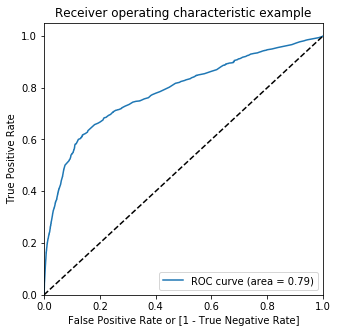

In [262]:
draw_roc(y_train_pred_final.Response, y_train_pred_final.response_prob_M8)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [263]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.response_prob_M8.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3,response_prob_M4,response_prob_M5,response_prob_M6,response_prob_M7,response_prob_M8,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.038247,7019,0,0.023439,0.023219,0.023221,0.023519,0.023474,0.023467,1,0,0,0,0,0,0,0,0,0
1,0,0.035951,27175,0,0.060584,0.060689,0.060702,0.061531,0.061465,0.066043,1,0,0,0,0,0,0,0,0,0
2,0,0.062175,15817,0,0.060159,0.059737,0.059751,0.060485,0.062021,0.061049,1,0,0,0,0,0,0,0,0,0
3,0,0.439087,40971,0,0.383084,0.406718,0.405891,0.409664,0.408339,0.408133,1,1,1,1,1,0,0,0,0,0
4,0,0.048891,8467,0,0.064583,0.064557,0.064541,0.062762,0.063307,0.062788,1,0,0,0,0,0,0,0,0,0


In [264]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.113003  1.000000  0.000000
0.1   0.1  0.767542  0.686311  0.777891
0.2   0.2  0.854115  0.579497  0.889102
0.3   0.3  0.888107  0.380602  0.952763
0.4   0.4  0.896708  0.249540  0.979158
0.5   0.5  0.899240  0.204113  0.987800
0.6   0.6  0.898720  0.161449  0.992648
0.7   0.7  0.895356  0.108042  0.995659
0.8   0.8  0.889494  0.029159  0.999101
0.9   0.9  0.886997  0.000000  1.000000


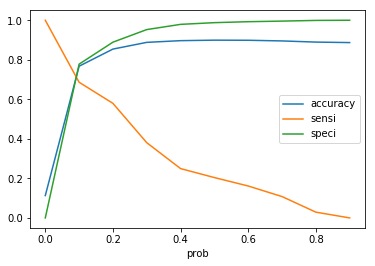

In [265]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [266]:
#Based on the plot, we have taken a cutoff of 0.1 as the intersection point of the 3 lines.
y_train_pred_final['final_predicted'] = y_train_pred_final.response_prob_M8.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Response,response_prob_M2,Prospect ID,predicted,response_prob_M3,response_prob_M4,response_prob_M5,response_prob_M6,response_prob_M7,response_prob_M8,...,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.038247,7019,0,0.023439,0.023219,0.023221,0.023519,0.023474,0.023467,...,0,0,0,0,0,0,0,0,0,0
1,0,0.035951,27175,0,0.060584,0.060689,0.060702,0.061531,0.061465,0.066043,...,0,0,0,0,0,0,0,0,0,0
2,0,0.062175,15817,0,0.060159,0.059737,0.059751,0.060485,0.062021,0.061049,...,0,0,0,0,0,0,0,0,0,0
3,0,0.439087,40971,0,0.383084,0.406718,0.405891,0.409664,0.408339,0.408133,...,1,1,1,1,0,0,0,0,0,1
4,0,0.048891,8467,0,0.064583,0.064557,0.064541,0.062762,0.063307,0.062788,...,0,0,0,0,0,0,0,0,0,0


In [267]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.final_predicted)

0.7675418820020117

In [268]:
#Confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.final_predicted )
confusion

array([[19893,  5680],
       [ 1022,  2236]], dtype=int64)

In [269]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [270]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6863106200122775

In [271]:
# Let us calculate specificity
TN / float(TN+FP)

0.7778907441442146

In [272]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.2221092558557854


In [273]:
# Positive predictive value 
print (TP / float(TP+FP))

0.28246589186457804


In [274]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9511355486492947


#### Precision and Recall


In [275]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.predicted )
print(confusion)


[[25261   312]
 [ 2593   665]]


In [276]:
from sklearn.metrics import precision_score, recall_score

In [277]:
precision_score(y_train_pred_final.Response, y_train_pred_final.predicted)

0.6806550665301945

In [278]:
recall_score(y_train_pred_final.Response, y_train_pred_final.predicted)

0.20411295273173727

### Precision and recall tradeoff

In [279]:
from sklearn.metrics import precision_recall_curve

In [280]:
y_train_pred_final.Response, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        1
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       1
 16       1
 17       0
 18       0
 19       1
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
         ..
 28801    0
 28802    0
 28803    1
 28804    1
 28805    0
 28806    0
 28807    0
 28808    1
 28809    0
 28810    0
 28811    0
 28812    0
 28813    0
 28814    0
 28815    0
 28816    0
 28817    0
 28818    0
 28819    0
 28820    1
 28821    0
 28822    1
 28823    0
 28824    0
 28825    0
 28826    0
 28827    0
 28828    0
 28829    0
 28830    0
 Name: Response, Length: 28831, dtype: int64, 0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       1
 11       0
 12       0
 13       0
 14       0
 15       1
 16       0
 17       0
 18    

In [281]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Response, y_train_pred_final.response_prob_M8)

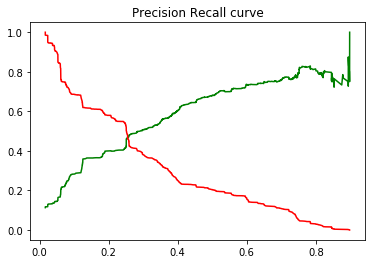

In [282]:
#Plot the precision recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall curve")
plt.show()

### Testing model on the test dataset

In [283]:
X_test = X_test[col]
X_test.head()

,job_retired,job_student,default_unknown,contact_telephone,month_dec,month_mar,month_may,month_sep,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
33148,0,0,0,0,0,0,1,0,1,0,-1.182133,-1.341349
27585,0,0,0,0,0,0,0,0,1,0,-0.650827,0.231937
15722,0,0,0,0,0,0,0,0,1,0,0.591769,0.773077
40349,0,0,0,0,0,0,0,0,0,1,0.780409,-1.567256
2576,0,0,0,1,0,0,1,0,1,0,0.723298,0.713143


In [284]:
X_test_sm = sm.add_constant(X_test)

In [285]:
y_test_pred = res.predict(X_test_sm)

In [286]:
y_test_pred[:10]

33148    0.122422
27585    0.079015
15722    0.061049
40349    0.721948
2576     0.023517
33359    0.122422
26890    0.076898
8032     0.062757
13180    0.060988
10102    0.059890
dtype: float64

In [287]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [288]:
# Let's see the head
y_pred_1.head()

,0
33148,0.122422
27585,0.079015
15722,0.061049
40349,0.721948
2576,0.023517


In [289]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [290]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

In [291]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [292]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [293]:
y_pred_final.head()

,response,ProspectID,0
0,0,33148,0.122422
1,0,27585,0.079015
2,0,15722,0.061049
3,1,40349,0.721948
4,0,2576,0.023517


In [294]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'response_Prob'})

In [295]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','response','response_Prob'], axis=1)

In [296]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,response,response_Prob
0,33148,0,0.122422
1,27585,0,0.079015
2,15722,0,0.061049
3,40349,1,0.721948
4,2576,0,0.023517


In [297]:
#Based on the precision recall curve, we have taken a cutoff of 0.28
y_pred_final['final_predicted'] = y_pred_final.response_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [298]:
y_pred_final.head()

,ProspectID,response,response_Prob,final_predicted
0,33148,0,0.122422,0
1,27585,0,0.079015,0
2,15722,0,0.061049,0
3,40349,1,0.721948,1
4,2576,0,0.023517,0


In [299]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.response, y_pred_final.final_predicted)

0.885570931455855

In [300]:
confusion2 = metrics.confusion_matrix(y_pred_final.response, y_pred_final.final_predicted )
confusion2

array([[10378,   597],
       [  817,   565]], dtype=int64)

In [301]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [302]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.40882778581765555

In [303]:
# Let us calculate specificity
TN / float(TN+FP)

0.9456036446469248

In [304]:
precision_score(y_pred_final.response, y_pred_final.final_predicted)

0.48623063683304646

In [305]:
recall_score(y_pred_final.response, y_pred_final.final_predicted)

0.40882778581765555

### Implementing Model on whole dataset 

In [306]:
loan_copy.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Prospect ID,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,1,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,2,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,3,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,4,...,1,0,0,0,0,1,0,1,1,0


In [307]:
# Putting feature variable to X
X = loan_copy.drop(['response','duration' ],axis=1)

# Putting response variable to y
y = loan_copy['response']


In [308]:
# Standardisation continuous features for X_train
X_df = X[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

std_X_df=(X_df-X_df.mean())/X_df.std()

X = X.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

X = pd.concat([X,std_X_df],axis=1)

In [309]:
X.head()

,Prospect ID,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1.576566,-0.651847,0.648084,0.722714,0.886436,0.712451,0.331676
1,1,0,0,0,0,0,0,1,0,0,...,1,1,0,1.674828,-0.651847,0.648084,0.722714,0.886436,0.712451,0.331676
2,2,0,0,0,0,0,0,1,0,0,...,1,1,0,-0.290405,-0.651847,0.648084,0.722714,0.886436,0.712451,0.331676
3,3,0,0,0,0,0,0,0,0,0,...,1,1,0,0.004380,-0.651847,0.648084,0.722714,0.886436,0.712451,0.331676
4,4,0,0,0,0,0,0,1,0,0,...,1,1,0,1.576566,-0.651847,0.648084,0.722714,0.886436,0.712451,0.331676


In [310]:
X_sm = sm.add_constant(X[col])

In [311]:
# Getting the predicted values on the full set
y_test_pred_full = res.predict(X_sm)
y_test_pred_full[:10]

0    0.023529
1    0.016477
2    0.023529
3    0.023529
4    0.023529
5    0.016477
6    0.023529
7    0.016477
8    0.023529
9    0.023529
dtype: float64

In [312]:
# Converting y_pred to a dataframe which is an array
y_pred_full = pd.DataFrame(y_test_pred_full)
y_pred_full.head()

,0
0,0.023529
1,0.016477
2,0.023529
3,0.023529
4,0.023529


In [313]:
# Converting y to dataframe
y_cmplt_test_df = pd.DataFrame(y)

In [314]:
y_cmplt_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
response    41188 non-null int64
dtypes: int64(1)
memory usage: 321.9 KB


In [315]:
# Putting ProspectID to index
y_cmplt_test_df['ProspectID'] = y_cmplt_test_df.index

In [316]:
y_cmplt_test_df.head()

,response,ProspectID
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [317]:
# Removing index for both dataframes to append them side by side 
y_pred_full.reset_index(drop=True, inplace=True)
y_cmplt_test_df.reset_index(drop=True, inplace=True)

In [318]:
# Appending y_cmplt_test_df and y_pred_full
y_pred_final = pd.concat([y_cmplt_test_df, y_pred_full],axis=1)
y_pred_final.head()

,response,ProspectID,0
0,0,0,0.023529
1,0,1,0.016477
2,0,2,0.023529
3,0,3,0.023529
4,0,4,0.023529


In [319]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'response_Prob'})

In [320]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','response','response_Prob'], axis=1)

In [321]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,response,response_Prob
0,0,0,0.023529
1,1,0,0.016477
2,2,0,0.023529
3,3,0,0.023529
4,4,0,0.023529


In [322]:
#Based on the precision recall curve, we have taken a cutoff of 0.28
y_pred_final['final_predicted'] = y_pred_final.response_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [323]:
y_pred_final.head()

,ProspectID,response,response_Prob,final_predicted
0,0,0,0.023529,0
1,1,0,0.016477,0
2,2,0,0.023529,0
3,3,0,0.023529,0
4,4,0,0.023529,0


In [324]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.response, y_pred_final.final_predicted)

0.8852578420899291

In [325]:
confusion3 = metrics.confusion_matrix(y_pred_final.response, y_pred_final.final_predicted )
confusion3

array([[34553,  1995],
       [ 2731,  1909]], dtype=int64)

In [326]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [327]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.41142241379310346

In [328]:
# Let us calculate specificity
TN / float(TN+FP)


0.9454142497537485

In [329]:
precision_score(y_pred_final.response, y_pred_final.final_predicted)

0.4889856557377049

In [330]:
recall_score(y_pred_final.response, y_pred_final.final_predicted)

0.41142241379310346

### Sort the data points in decreasing order of the probability of response

In [331]:
sorted_df = y_pred_final.sort_values(['response_Prob'], ascending=False)
sorted_df.set_index('ProspectID', inplace = True)
sorted_df.head(10)

,response,response_Prob,final_predicted
ProspectID,,,
39340,1,0.898176,1
39336,1,0.898078,1
39325,1,0.897980,1
39326,0,0.897980,1
39258,1,0.897488,1
39153,1,0.897192,1
39147,1,0.897192,1
39378,1,0.895134,1
39348,1,0.895134,1


### Create a data frame with the variables prospect ID, actual response, predicted response, predicted probability of response, duration of the call in seconds and cost of the call

In [332]:
y_pred_final = pd.concat([y_pred_final,loan_copy.duration],axis=1)
y_pred_final.head()

,ProspectID,response,response_Prob,final_predicted,duration
0,0,0,0.023529,0,261
1,1,0,0.016477,0,149
2,2,0,0.023529,0,226
3,3,0,0.023529,0,151
4,4,0,0.023529,0,307


In [333]:
y_pred_final

,ProspectID,response,response_Prob,final_predicted,duration
0,0,0,0.023529,0,261
1,1,0,0.016477,0,149
2,2,0,0.023529,0,226
3,3,0,0.023529,0,151
4,4,0,0.023529,0,307
5,5,0,0.016477,0,198
6,6,0,0.023529,0,139
7,7,0,0.016477,0,217
8,8,0,0.023529,0,380
9,9,0,0.023529,0,50


In [334]:
y_pred_final.rename({'response':'Actual_Response','response_Prob':'Predicted_Prob','final_predicted':'Predicted_Response'}, axis=1, inplace=True)
y_pred_final.head()

,ProspectID,Actual_Response,Predicted_Prob,Predicted_Response,duration
0,0,0,0.023529,0,261
1,1,0,0.016477,0,149
2,2,0,0.023529,0,226
3,3,0,0.023529,0,151
4,4,0,0.023529,0,307


In [335]:
# calculating cost of call. Assuming cost as $1 for 1 minute


#creating a function for cost of call
def calculate_cost(duration):
    
    import math
    # returns the difference between post and pre
    return (duration/60)

#create a variable that is the output of the function
y_pred_final['Call_Cost'] = (calculate_cost(y_pred_final['duration'])).round(2)

#view the dataframe

y_pred_final.head()

,ProspectID,Actual_Response,Predicted_Prob,Predicted_Response,duration,Call_Cost
0,0,0,0.023529,0,261,4.35
1,1,0,0.016477,0,149,2.48
2,2,0,0.023529,0,226,3.77
3,3,0,0.023529,0,151,2.52
4,4,0,0.023529,0,307,5.12


In [336]:
y_pred_final['duration'].sum()

10476136

In [337]:
y_pred_final['Call_Cost'].sum()

174601.81

### Find the number of top 80% prospects you should target to meet the business objective & Create a lift chart

#### Creating Deciles to check the gain and lift

In [338]:
pred_prob = pd.DataFrame(pd.Series(y_test_pred_full), columns = ['pred_prob'])

In [339]:
decile_df = pd.concat([pd.DataFrame(y).reset_index(), pred_prob], ignore_index=True,axis=1)

In [340]:
decile_df.drop(0, inplace=True, axis = 1)

In [341]:
decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [342]:
decile_df['predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.28 else 0)

In [343]:
decile_df

,actual,pred_prob,predicted
0,0,0.023529,0
1,0,0.016477,0
2,0,0.023529,0
3,0,0.023529,0
4,0,0.023529,0
5,0,0.016477,0
6,0,0.023529,0
7,0,0.016477,0
8,0,0.023529,0
9,0,0.023529,0


In [344]:
decile_df.actual.sum()

4640

In [345]:
decile_df.predicted.sum()

3904

In [346]:
100*(decile_df['actual'].sum()/decile_df['actual'].count()).round(4)

11.27

In [347]:
100*(decile_df['predicted'].sum()/decile_df['predicted'].count()).round(4)

9.48

In [348]:
100*(decile_df['predicted'].sum()/decile_df['actual'].sum()).round(4)

84.14

In [349]:
y_pred_final_copy = y_pred_final

In [350]:
y_pred_final_copy['decile'] = pd.qcut(y_pred_final['Predicted_Prob'], 10, labels=np.arange(10, 0, -1))

In [351]:
df_prob = y_pred_final_copy.groupby('decile')['Predicted_Prob'].count().reset_index()

In [352]:
df_prob.rename({'Predicted_Prob':'total'}, axis=1, inplace=True)

In [353]:
df_actual = y_pred_final_copy[y_pred_final_copy['Actual_Response']==1].groupby('decile')['Actual_Response'].count().reset_index()

In [354]:
df_duration = y_pred_final_copy.groupby('decile')['duration'].sum().reset_index()

In [355]:
df_call_cost = y_pred_final_copy.groupby('decile')['Call_Cost'].sum().reset_index()

In [356]:
df_final_cost = df_prob.merge(df_actual,on = 'decile')

In [357]:
df_final_lift = df_final_cost.merge(df_duration,on = 'decile')

In [358]:
final_df = df_final_lift.merge(df_call_cost,on = 'decile')

In [359]:
final_df = final_df.sort_values(['decile'], ascending=False)

In [360]:
final_df['cumresp'] = final_df['Actual_Response'].cumsum()

In [361]:
final_df['gain'] = (100*(final_df['cumresp']/sum(final_df['Actual_Response']))).round(0)

In [362]:
final_df['cumlift'] = (final_df['gain']/(final_df['decile'].astype('int')*(100/10))).round(2)

In [363]:
final_df['cum_duration'] = final_df['duration'].cumsum()

In [364]:
final_df['cumcost'] = final_df['Call_Cost'].cumsum()

In [365]:
final_df['avg_duration'] = (final_df['duration'].cumsum()/final_df['total'].cumsum()).round(2)

In [366]:
final_df

,decile,total,Actual_Response,duration,Call_Cost,cumresp,gain,cumlift,cum_duration,cumcost,avg_duration
9,1,4116,1961,1182580,19709.36,1961,42.0,4.20,1182580,19709.36,287.31
8,2,3957,892,1073718,17895.07,2853,61.0,3.05,2256298,37604.43,279.49
7,3,4274,399,1099886,18331.33,3252,70.0,2.33,3356184,55935.76,271.82
6,4,3882,206,931404,15523.45,3458,75.0,1.88,4287588,71459.21,264.19
5,5,3902,243,1075661,17927.27,3701,80.0,1.60,5363249,89386.48,266.42
4,6,4074,216,952906,15881.80,3917,84.0,1.40,6316155,105268.28,260.94
3,7,4600,233,1055716,17595.32,4150,89.0,1.27,7371871,122863.60,255.92
2,8,4131,233,965891,16098.65,4383,94.0,1.18,8337762,138962.25,253.15
1,9,4034,110,1016312,16938.66,4493,97.0,1.08,9354074,155900.91,253.02
0,10,4218,147,1122062,18700.90,4640,100.0,1.00,10476136,174601.81,254.35


### Findings

#### If we market to only the top 5 deciles (50% of the customers i.e. 20131 customers), we will capture around 80% of the responders. In other words:

####  We can acquire around 80% of responders at a 50% cost.

### The average call duration for targeting the top 80% prospects is 266.42 seconds i.e. approx 4.5 minutes

### Gain chart


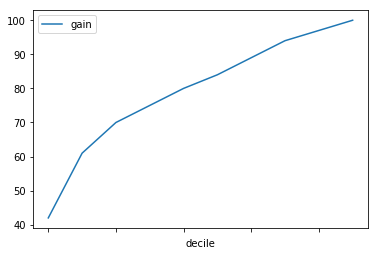

In [367]:
final_df.plot.line(x='decile', y=['gain'])

### Lift chart

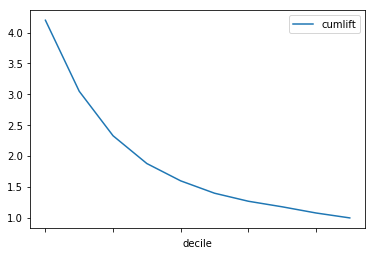

In [368]:
final_df.plot.line(x='decile', y=['cumlift'])

### Determine the cost of acquisition

### Cumulative cost at the 5th Decile i.e. $89386.48 will be the cost incurred for acquiring 80% of customers using the predictive model

In [369]:
final_df.head(5)

,decile,total,Actual_Response,duration,Call_Cost,cumresp,gain,cumlift,cum_duration,cumcost,avg_duration
9,1,4116,1961,1182580,19709.36,1961,42.0,4.20,1182580,19709.36,287.31
8,2,3957,892,1073718,17895.07,2853,61.0,3.05,2256298,37604.43,279.49
7,3,4274,399,1099886,18331.33,3252,70.0,2.33,3356184,55935.76,271.82
6,4,3882,206,931404,15523.45,3458,75.0,1.88,4287588,71459.21,264.19
5,5,3902,243,1075661,17927.27,3701,80.0,1.60,5363249,89386.48,266.42
